# Load & Inspect the Dataset

In [1]:
import pandas as pd
import numpy as np

In [46]:
df = pd.read_csv("AFE.csv")
df.head()

,Report_ID,Date,Aircraft_Make,Aircraft_Model,Flight_Phase,System,Component,Severity,Location,Narrative,Root_Cause_Keywords,Model_Age
0,4059770,2021-01-18,Airbus,A350,Cruise,Hydraulic,Pump,Low,NJ,"Pump failed to respond, irregular cycling obse...","pump, hydraulic",14
1,4021362,2016-07-03,Embraer,E190,Climb,A/C (Environmental),Compressor,Moderate,GA,Compressor cycling irregularly; passenger disc...,"compressor, a/c",21
2,4127324,2010-09-01,Airbus,A320,Climb,Electrical,Bus Tie,Low,AZ,Bus Tie fault reported; unexpected shutdown le...,"bus_tie, electrical",25
3,4140509,2024-10-25,Boeing,777-300,Taxi,A/C (Environmental),Ventilation Fan,Moderate,MD,Reports of checklist execution due to Ventilat...,"ventilation_fan, a/c",30
4,4144297,2024-04-19,ATR,ATR72,Landing,Avionics,Flight Computer,Low,CO,Flight Computer produced erroneous reading...,"flight_computer, avionics",29


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150300 entries, 0 to 150299
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Report_ID            150300 non-null  int64 
 1   Date                 150300 non-null  object
 2   Aircraft_Make        150300 non-null  object
 3   Aircraft_Model       150300 non-null  object
 4   Flight_Phase         150300 non-null  object
 5   System               150300 non-null  object
 6   Component            149550 non-null  object
 7   Severity             149853 non-null  object
 8   Location             150300 non-null  object
 9   Narrative            148697 non-null  object
 10  Root_Cause_Keywords  150300 non-null  object
 11  Model_Age            150300 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 13.8+ MB


In [48]:
df.describe(include='all')

,Report_ID,Date,Aircraft_Make,Aircraft_Model,Flight_Phase,System,Component,Severity,Location,Narrative,Root_Cause_Keywords,Model_Age
count,1.503000e+05,150300,150300,150300,150300,150300,149550,149853,150300,148697,150300,150300.000000
unique,NaN,5479,6,19,8,6,28,4,20,43968,28,NaN
top,NaN,2014-08-15,Boeing,737-900,Cruise,Electrical,Bus Tie,Low,GA,"Hydraulic leak suspected in Pump, leading to r...","bus_tie, electrical",NaN
freq,NaN,60,52962,10732,44813,60209,10108,80979,7738,127,10148,NaN
mean,4.074999e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.029621
std,4.330474e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.542379
min,4.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
25%,4.037499e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000
50%,4.074990e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.000000
75%,4.112501e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000


In [49]:
df.columns

Index(['Report_ID', 'Date', 'Aircraft_Make', 'Aircraft_Model', 'Flight_Phase',
       'System', 'Component', 'Severity', 'Location', 'Narrative',
       'Root_Cause_Keywords', 'Model_Age'],
      dtype='object')

In [50]:
df['System'].value_counts()

System
Electrical             60209
A/C (Environmental)    37591
Avionics               26876
Hydraulic              11885
Landing Gear            9106
Fuel                    4633
Name: count, dtype: int64

In [51]:
df['Component'].value_counts()

Component
Bus Tie                 10108
Power Bus               10096
Circuit Breaker         10048
Wiring Harness           9904
Battery                  9903
Generator                9868
Pressurization Valve     7506
Compressor               7493
Ventilation Fan          7486
Temperature Sensor       7469
Cabin Cooling Unit       7441
Control Panel            5456
Display Unit             5393
Sensor Module            5316
GPS Antenna              5298
Flight Computer          5275
Hydraulic Line           3023
Pump                     2982
Accumulator              2965
Valve                    2847
Retraction Motor         2286
Actuator                 2283
Tire                     2257
Brake Unit               2238
Fuel Valve               1184
Fuel Filter              1164
Fuel Pump                1143
Fuel Line                1118
Name: count, dtype: int64

In [52]:
df['Flight_Phase'].value_counts()

Flight_Phase
Cruise      44813
Climb       22365
Descent     18104
Taxi        18084
Landing     15224
Takeoff     15000
Approach    12160
Ground       4550
Name: count, dtype: int64

In [53]:
df['Severity'].value_counts()

Severity
Low            80979
Moderate       33497
Significant    22440
Major          12937
Name: count, dtype: int64

In [54]:
df.duplicated().sum()

0

In [55]:
df.isna().sum()

Report_ID                 0
Date                      0
Aircraft_Make             0
Aircraft_Model            0
Flight_Phase              0
System                    0
Component               750
Severity                447
Location                  0
Narrative              1603
Root_Cause_Keywords       0
Model_Age                 0
dtype: int64

In [56]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.to_period('M')

In [57]:
df['Year'].value_counts().sort_index()

Year
2010    10142
2011     9907
2012    10002
2013     9875
2014     9943
2015     9852
2016     9983
2017     9992
2018    10109
2019    10057
2020    10211
2021    10176
2022    10068
2023     9881
2024    10102
Name: count, dtype: int64

## Data Cleaning & Standardization

In [58]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [59]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.to_period('M')

In [60]:
df['System'] = df['System'].str.strip().str.title()

In [61]:
df['Component'] = df['Component'].str.strip().str.title()

In [62]:
df['Severity'] = df['Severity'].str.title()
df['Severity'] = pd.Categorical(
    df['Severity'],
    categories=['Low', 'Moderate', 'Significant', 'Major'],
    ordered=True
)

In [63]:
df['Flight_Phase'] = df['Flight_Phase'].str.title().str.strip()

In [64]:
df['Location'] = df['Location'].str.upper().str.strip()

In [65]:
df['Narrative_clean'] = (
    df['Narrative']
    .str.lower()
    .str.replace(r'[^a-z0-9\s]', '', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
)

In [66]:
df.sample(5)

,Report_ID,Date,Aircraft_Make,Aircraft_Model,Flight_Phase,System,Component,Severity,Location,Narrative,Root_Cause_Keywords,Model_Age,Year,Month,Narrative_clean
94892,4001804,2020-10-19,Airbus,A330,Cruise,Hydraulic,Hydraulic Line,Significant,TX,"Hydraulic Line failed to respond, stuck observ...","hydraulic_line, hydraulic",21,2020,2020-10,hydraulic line failed to respond stuck observe...
132137,4123675,2019-05-29,Airbus,A330,Takeoff,A/C (Environmental),Temperature Sensor,Low,TX,Temperature Sensor showed pressure loss during...,"temperature_sensor, a/c",21,2019,2019-05,temperature sensor showed pressure loss during...
87188,4085525,2023-10-24,Boeing,737-800,Cruise,Electrical,Circuit Breaker,Moderate,NC,Circuit Breaker fault reported; short circuit ...,"circuit_breaker, electrical",5,2023,2023-10,circuit breaker fault reported short circuit l...
46279,4058189,2018-08-29,Embraer,E190,Descent,A/C (Environmental),Ventilation Fan,Moderate,NJ,AC/heating issue: Ventilation Fan error code 0...,"ventilation_fan, a/c",21,2018,2018-08,acheating issue ventilation fan error code 0x1...
109297,4103180,2010-05-22,Bombardier,Q400,Takeoff,Electrical,Circuit Breaker,Low,WA,Crew noted checklist execution after Circuit B...,"circuit_breaker, electrical",13,2010,2010-05,crew noted checklist execution after circuit b...


In [67]:
df.isnull().sum()

Report_ID                 0
Date                      0
Aircraft_Make             0
Aircraft_Model            0
Flight_Phase              0
System                    0
Component               750
Severity                447
Location                  0
Narrative              1603
Root_Cause_Keywords       0
Model_Age                 0
Year                      0
Month                     0
Narrative_clean        1603
dtype: int64

In [68]:
df.to_csv("Aircraft_Fault_Dataset_cleaned.csv", index = False)

------------------

# EDA

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

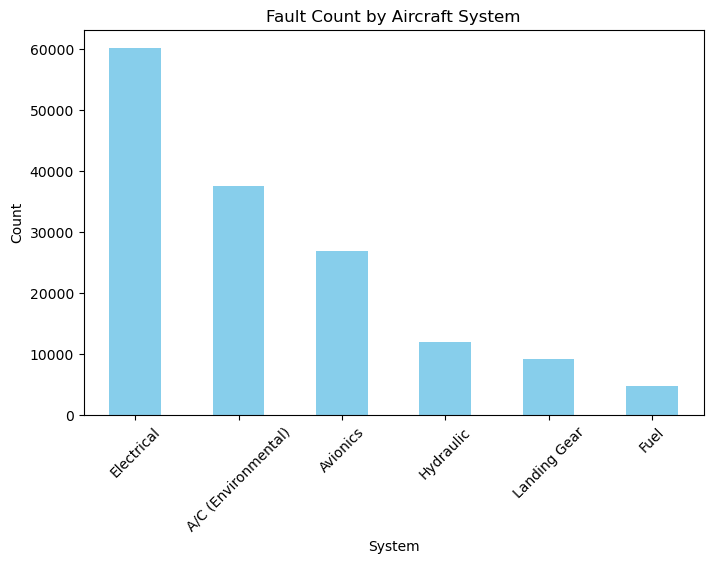

In [70]:
plt.figure(figsize=(8,5))
df['System'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Fault Count by Aircraft System")
plt.xlabel("System")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

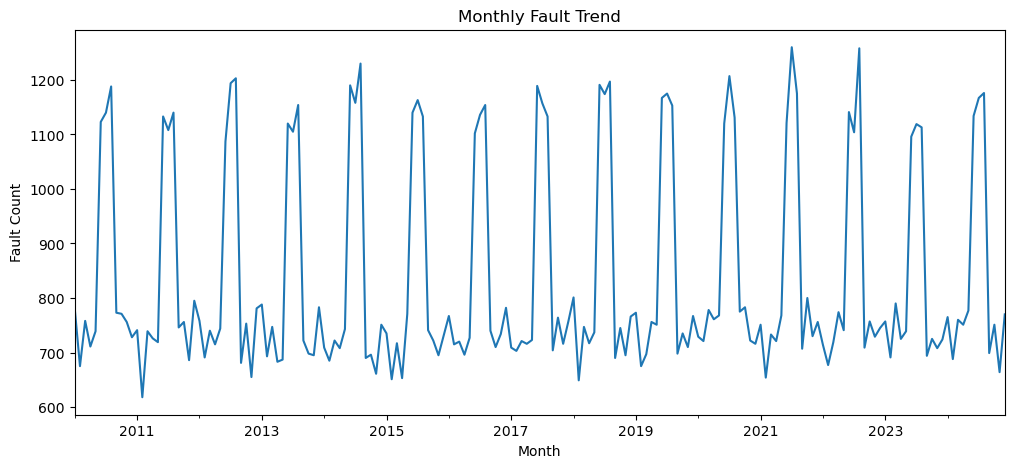

In [71]:
df['Date'] = pd.to_datetime(df['Date'])
monthly_trend = df.groupby('Month').size()

plt.figure(figsize=(12,5))
monthly_trend.plot()
plt.title("Monthly Fault Trend")
plt.ylabel("Fault Count")
plt.xlabel("Month")
plt.show()

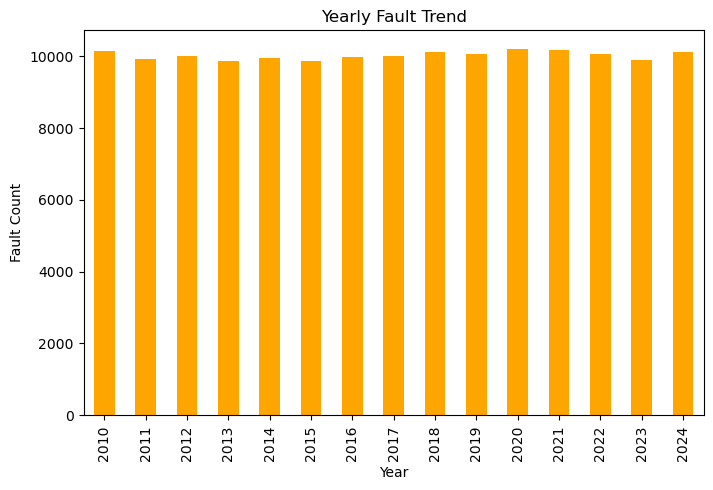

In [72]:
year_trend = df.groupby('Year').size()

plt.figure(figsize=(8,5))
year_trend.plot(kind='bar', color='orange')
plt.title("Yearly Fault Trend")
plt.xlabel("Year")
plt.ylabel("Fault Count")
plt.show()

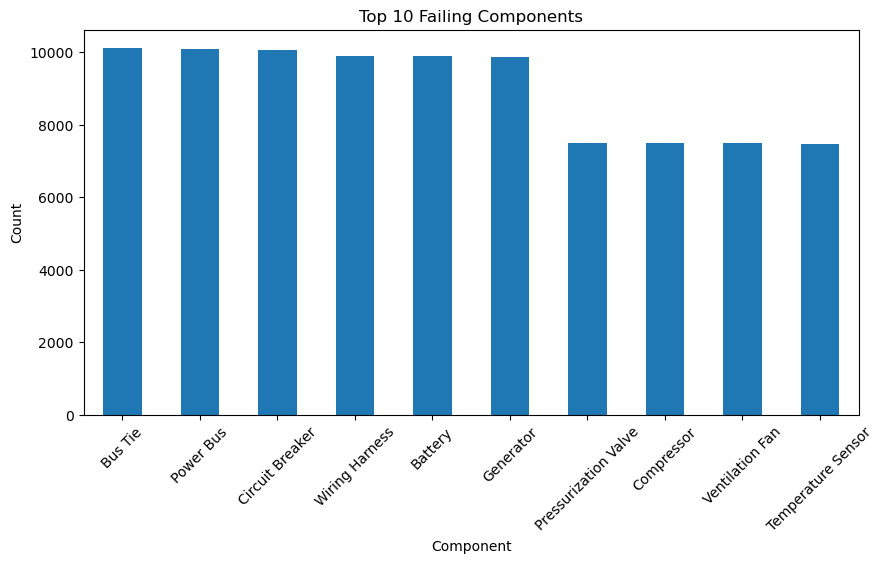

In [73]:
plt.figure(figsize=(10,5))
df['Component'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Failing Components")
plt.xlabel("Component")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

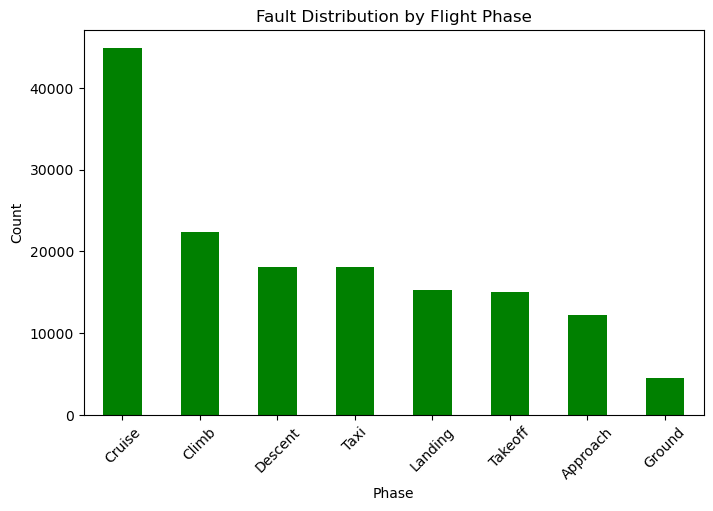

In [75]:
plt.figure(figsize=(8,5))
df['Flight_Phase'].value_counts().plot(kind='bar', color='green')
plt.title("Fault Distribution by Flight Phase")
plt.xlabel("Phase")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

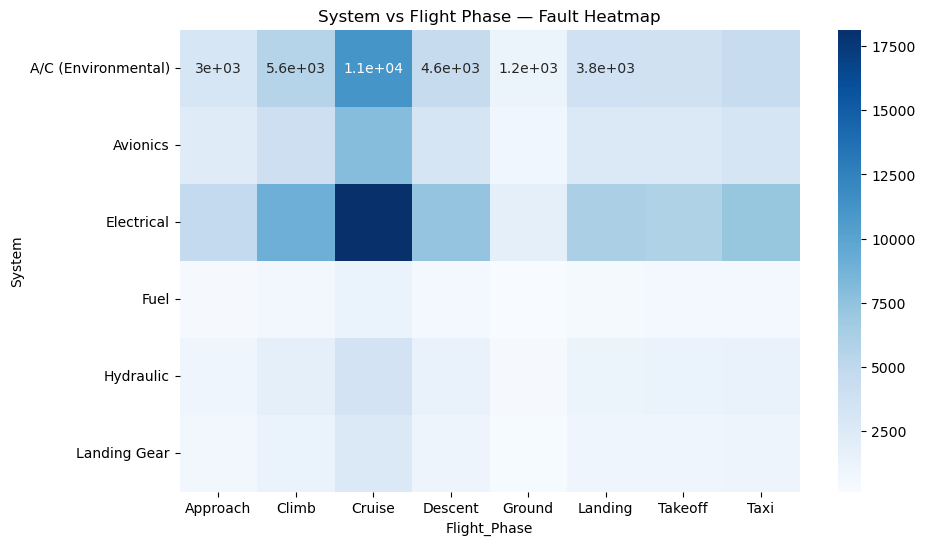

In [76]:
pivot = df.pivot_table(
    index='System',
    columns='Flight_Phase',
    values='Report_ID',
    aggfunc='count'
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap='Blues')
plt.title("System vs Flight Phase — Fault Heatmap")
plt.show()

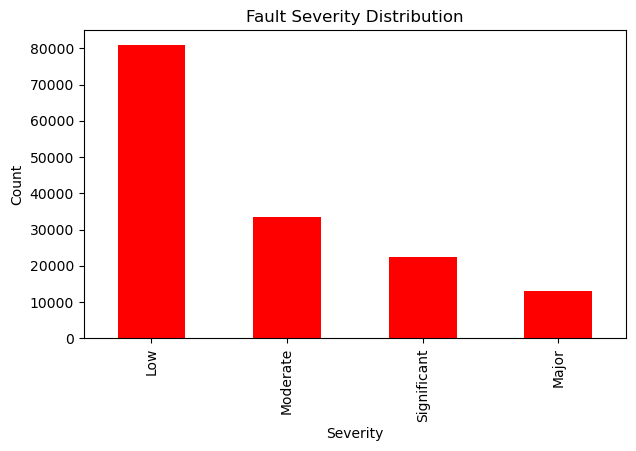

In [77]:
plt.figure(figsize=(7,4))
df['Severity'].value_counts().plot(kind='bar', color='red')
plt.title("Fault Severity Distribution")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()

===========

## TEXT MINING ON INCIDENT NARRATIVES

In [78]:
import re
from collections import Counter

In [79]:
df['Narrative_clean'] = (
    df['Narrative']
      .str.lower()
      .str.replace(r'[^a-z0-9\s]', '', regex=True)
      .str.replace(r'\s+', ' ', regex=True)
      .str.strip()
)

In [80]:
df['Narrative_clean'].head()

0    pump failed to respond irregular cycling obser...
1    compressor cycling irregularly passenger disco...
2    bus tie fault reported unexpected shutdown led...
3    reports of checklist execution due to ventilat...
4    flight computer produced erroneous readings ov...
Name: Narrative_clean, dtype: object

In [84]:
# Tokenization
df['tokens'] = df['Narrative_clean'].str.split()
df['tokens'].head()

0    [pump, failed, to, respond, irregular, cycling...
1    [compressor, cycling, irregularly, passenger, ...
2    [bus, tie, fault, reported, unexpected, shutdo...
3    [reports, of, checklist, execution, due, to, v...
4    [flight, computer, produced, erroneous, readin...
Name: tokens, dtype: object

In [83]:
all_words = []
df['tokens'].apply(lambda x: all_words.extend(x))

word_freq = Counter(all_words).most_common(30)
word_freq

TypeError: 'float' object is not iterable

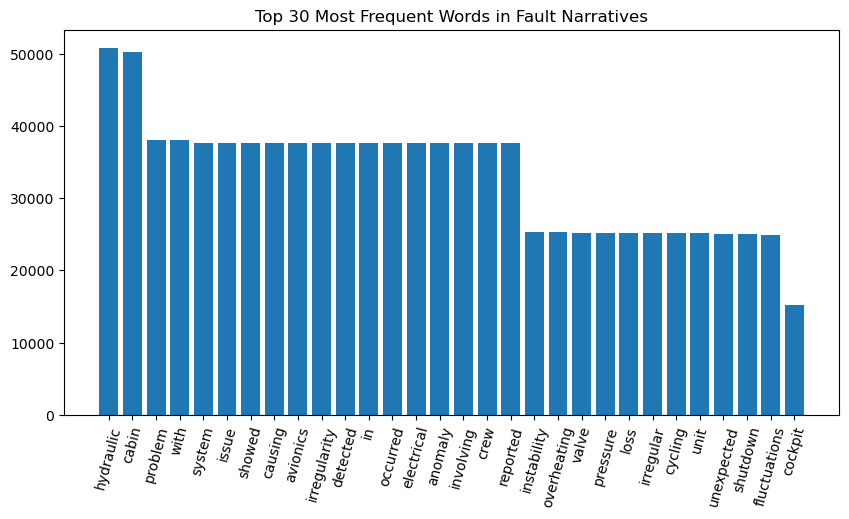

In [85]:
words, counts = zip(*word_freq)
plt.figure(figsize=(10,5))
plt.bar(words, counts)
plt.xticks(rotation=75)
plt.title("Top 30 Most Frequent Words in Fault Narratives")
plt.show()

In [86]:
def categorize_root_cause(text):
    
    if "overheat" in text or "heat" in text:
        return "overheating"
    
    if "shutdown" in text:
        return "unexpected_shutdown"
    
    if "pressure" in text or "pressur" in text:
        return "pressure_issue"
    
    if "instability" in text or "unstable" in text:
        return "instability"
    
    if "fluctuation" in text or "fluctuat" in text:
        return "fluctuation"
    
    if "irregular" in text or "cycling" in text:
        return "irregular_behavior"
    
    if "smell" in text or "burn" in text:
        return "burning_smell"
    
    if "fail" in text or "fault" in text:
        return "general_failure"

    return "other"

In [90]:
df['Root_Cause_Category'] = df['Narrative_clean'].apply(categorize_root_cause)
df['Root_Cause_Category'].value_counts()

KeyError: 'Narrative_Clean'

In [88]:
df['Root_Cause_Category'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Root Cause Categories from Narrative Text")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

KeyError: 'Root_Cause_Category'

In [89]:
pivot = df.pivot_table(
    index='System',
    columns='Root_Cause_Category',
    values='Report_ID',
    aggfunc='count'
)

plt.figure(figsize=(12,8))
import seaborn as sns
sns.heatmap(pivot, annot=False, cmap='Blues')
plt.title("System vs Root Cause Heatmap")
plt.show()

KeyError: 'Root_Cause_Category'

In [45]:
df.to_csv('AFE_TextMining_Output.csv', index=False)